In [1]:
#
# plot time evolution of 2m temperature using ZL0 dataset
# see https://easy.gems.dkrz.de/Processing/healpix/index.html
#
%config InlineBackend.print_figure_kwargs = {"dpi": 72}
import intake
# for online
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")["online"]
# for nowake
#cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")["JAPAN"]
zd = cat.nicam_gl11(time="PT3H", zoom=0).to_dask()
zd

/home/t-ohno/local/miniforge3/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 5MB
Dimensions:    (time: 2920, cell: 12, bnds: 2)
Coordinates:
    lev        float64 8B ...
  * time       (time) datetime64[ns] 23kB 2020-03-01T01:30:00 ... 2021-02-28T...
Dimensions without coordinates: cell, bnds
Data variables: (12/30)
    clivi      (time, cell) float32 140kB ...
    clt        (time, cell) float64 280kB ...
    clwvi      (time, cell) float32 140kB ...
    healpix    int32 4B ...
    hflsd      (time, cell) float32 140kB ...
    hfssd      (time, cell) float32 140kB ...
    ...         ...
    rsutcs     (time, cell) float32 140kB ...
    tas        (time, cell) float64 280kB ...
    time_bnds  (time, bnds) datetime64[ns] 47kB ...
    ts         (time, cell) float64 280kB ...
    uas        (time, cell) float64 280kB ...
    vas        (time, cell) float64 280kB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    comment:      Be careful that definition of time coordinate depends on th...
    history:      Fri Mar 07 10:03:09 2025: cdo mergetime ./z00/2020/03/3hour...
    title:        NICAM data output

In [2]:
t2m = zd.tas # tas: 2m temperature
t2m

<xarray.DataArray 'tas' (time: 2920, cell: 12)> Size: 280kB
[35040 values with dtype=float64]
Coordinates:
    lev      float64 8B ...
  * time     (time) datetime64[ns] 23kB 2020-03-01T01:30:00 ... 2021-02-28T22...
Dimensions without coordinates: cell
Attributes:
    grid_mapping:                healpix
    long_name:                   2m temperature
    units:                       K
    var_force_to_set_valid_max:  700.0
    var_force_to_set_valid_min:  50.0

In [3]:
t = t2m.time # time
t2m_mean = t2m.mean(dim='cell') # global averave of t2m (only 12 cells exist in the case with ZL 0)
t2m_daily = t2m_mean.rolling(time=8,center=True).mean() # daily average

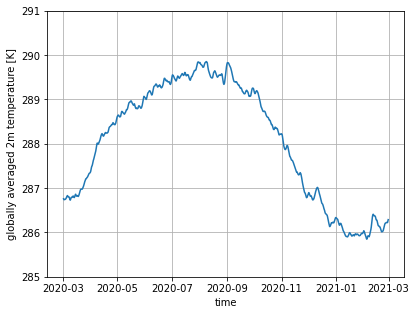

In [4]:
import matplotlib.pyplot as plt

plt.plot( t, t2m_daily )
plt.xlabel("time")
plt.ylabel("globally averaged 2m temperature [K]")
plt.ylim(285., 291.)
plt.grid()